In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [14]:
# 

file = pd.read_csv("coin_Bitcoin.csv")
file.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [15]:
file["Y"] = (file["Low"] + file["High"])/2
file.drop(["Open", "Close"], axis=1, inplace=True)

# first convert the date column to datetime format
file["Date"] = pd.to_datetime(file["Date"])
#now change it into Integer so that we can use it in our model
file["Date"] = file["Date"].map(pd.Timestamp.to_julian_date)#.astype(int)
file.head()


,SNo,Name,Symbol,Date,High,Low,Volume,Marketcap,Y
0,1,Bitcoin,BTC,2.456412e+06,147.488007,134.000000,0.0,1.603769e+09,140.744003
1,2,Bitcoin,BTC,2.456413e+06,146.929993,134.050003,0.0,1.542813e+09,140.489998
2,3,Bitcoin,BTC,2.456414e+06,139.889999,107.720001,0.0,1.298955e+09,123.805000
3,4,Bitcoin,BTC,2.456415e+06,125.599998,92.281898,0.0,1.168517e+09,108.940948
4,5,Bitcoin,BTC,2.456416e+06,108.127998,79.099998,0.0,1.085995e+09,93.613998


In [16]:
# 4- Before applying machine learning divide the data into training and testing part with 70-30
# aspect ratio.
from sklearn.model_selection import train_test_split
X = file[["Date", "High", "Low", "Volume", "Marketcap"]]
y = file["Y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

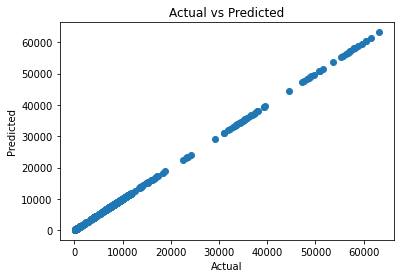

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Plot the linear regression model
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()